<a href="https://colab.research.google.com/github/sisifo3/EEG_to_-CWT/blob/main/waveletdiagnosingControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from scipy.spatial.distance import pdist, squareform 
from google.colab import files
from math import floor
from tqdm import tqdm
import os
import cv2

import random
from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image
from torch.autograd import Variable



from __future__ import print_function, division

from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import copy 

from scipy.io import wavfile
import numpy as np
import pywt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving v302pBW.txt to v302pBW.txt


In [ ]:
data_f = pd.read_table('/content/v302pBW.txt')
#data_f2 = pd.read_table('/content/v27pBW.txt')

In [ ]:
data_f.describe()

,Time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz
count,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.00000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000
mean,54953.950872,0.026947,-0.004648,0.027680,-0.026583,0.023605,-0.026086,-0.016779,-0.007615,-0.01587,0.004372,0.019069,-0.024295,-0.004354,-0.007407,-0.039322,-0.036390,0.044949,0.010783,-0.019864
std,31731.061271,55.167896,49.321769,51.954573,51.540800,52.835372,50.669108,71.300580,50.267349,57.79074,57.174323,42.321358,48.131352,48.315067,43.217180,59.053485,46.441994,52.976396,55.804748,61.754769
min,0.000000,-393.041700,-523.208600,-250.730100,-309.660600,-210.150000,-215.804700,-490.340200,-237.615700,-223.99640,-312.841800,-231.656400,-552.470900,-173.077000,-259.249600,-250.021600,-195.112400,-301.076000,-273.869400,-314.379800
25%,27476.975400,-36.784800,-31.148500,-34.258900,-34.010900,-34.926700,-33.739000,-45.441200,-33.233600,-37.30350,-37.945000,-27.147300,-27.934200,-31.864100,-28.123800,-38.928400,-30.434900,-33.874100,-35.927400,-39.869300
50%,54953.950900,0.029000,-0.141800,0.014100,0.129400,-0.164000,-0.211800,0.392100,0.400500,0.27110,0.552200,-0.135500,-0.065400,-0.691100,0.241400,-0.076300,-0.016300,0.468800,-0.194300,0.320800
75%,82430.926300,35.883000,31.140600,33.947700,33.507600,34.913100,33.611500,44.316500,33.743700,38.65100,37.964200,26.927800,28.025500,31.687000,27.988500,39.003400,31.065800,34.052800,36.155800,41.230500
max,109907.901700,425.375100,695.981900,241.032700,285.160000,232.076200,251.806900,536.933800,178.898500,248.38580,232.953200,214.874100,756.366600,224.343400,195.857300,254.654400,190.679700,316.874900,263.285300,274.818200


In [ ]:
data_1 = data_f['Pz']
#data_12 = data_f2['Fz']

In [ ]:
data100 = data_1/100
#data1002 = data_12/100

NameError: ignored

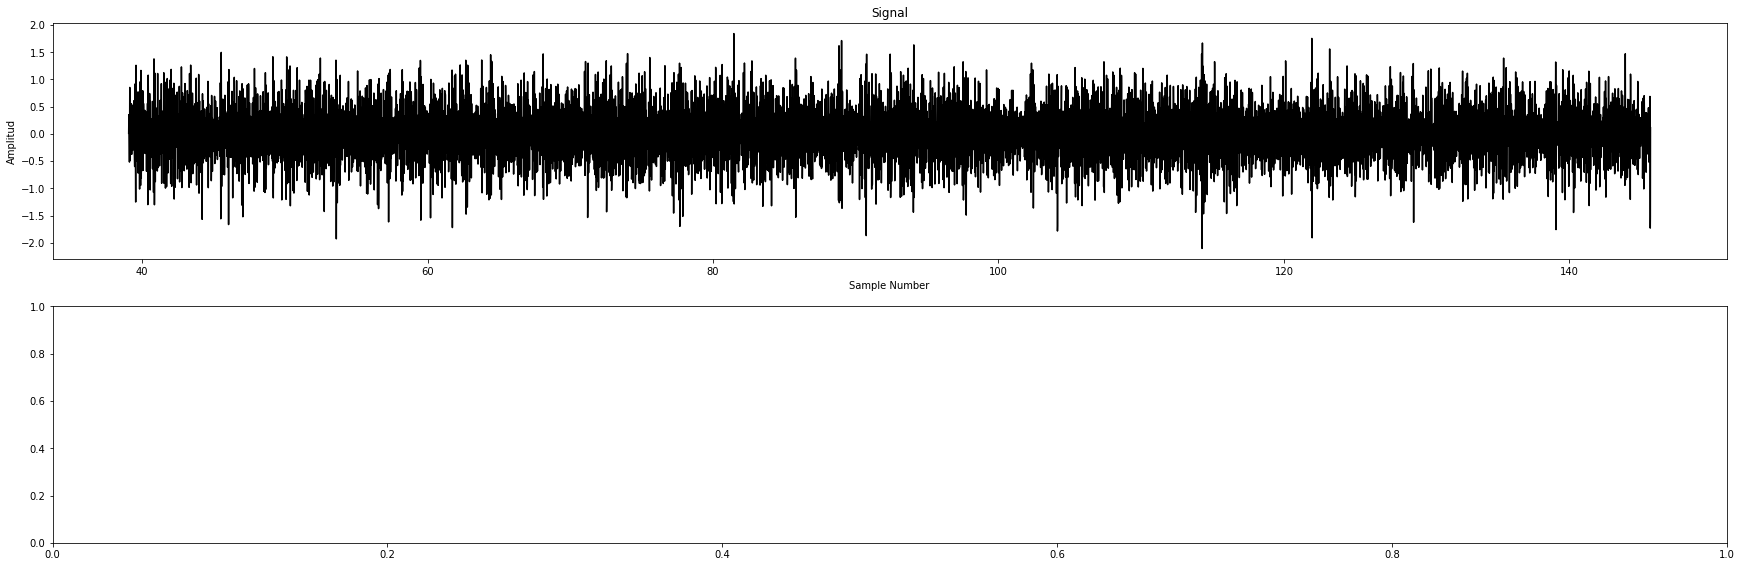

In [ ]:
samples = np.arange(5000, len(data100))
Fs = 128            # Sampling Frequency (Hz)
t = samples/Fs      # Time Vector (seconds)

#print(t)
#L = len(data_1)
#y=y[0:L]

plt.figure(figsize=(30,20))

plt.subplot(4,1,1)
plt.plot(t,data100[5000:len(data100)],color='k')
plt.xlabel('Sample Number')
plt.ylabel('Amplitud')
plt.title('Signal')


plt.subplot(4,1,2)
plt.plot(t,data1002[5000:len(data100)],color='k')
plt.xlabel('Sample Number')
plt.ylabel('Amplitud')
plt.title('Signal')


plt.ylim([-3, 3])
plt.savefig('plot.jpg', dpi=100)
plt.show()

In [ ]:
val_t = 'Control'
pack = 'v109'
count = 'Fz'
name = pack + val_t

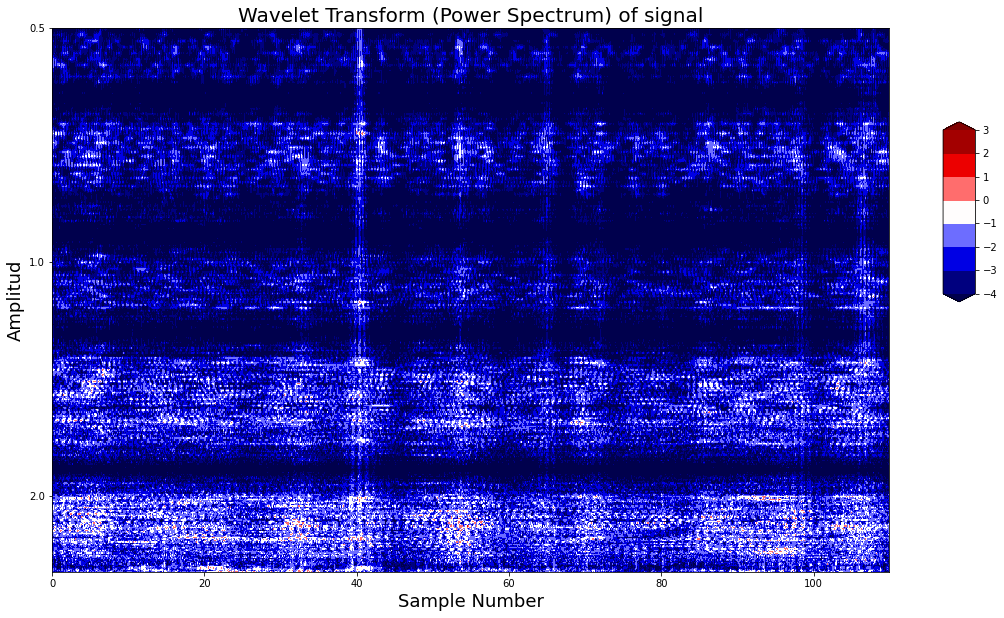

In [ ]:
scales = range(1,261)

samples = np.arange(0, len(data100))
Fs = 128            
time = samples/Fs      
signal = data100[0:len(data100)]



#waveletname = 'bior2.8'
#waveletname = 'cmor'
waveletname = 'morl' 
cmap = plt.cm.seismic
title = 'Wavelet Transform (Power Spectrum) of signal' 
ylabel = 'Amplitud' 
xlabel = 'Sample Number'




dt = time[1] - time[0]
[coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
power = (abs(coefficients)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
ax.set_title(title, fontsize=20)
ax.set_ylabel(ylabel, fontsize=18)
ax.set_xlabel(xlabel, fontsize=18)
    
yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)
    
cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.savefig('plot'+name+count+'.jpg', dpi=100)
plt.show()

In [ ]:
!cp plotv60ControlFz.jpg "/content/drive/MyDrive/datasetCWT2/train/Control"
!rm plotv60ControlFz.jpg

Code for make imagens of 1000  points

> Indented block



In [ ]:
data_f = pd.read_table('/content/v302pBW.txt')

In [ ]:
data_f.describe()

,Time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz
count,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.00000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000,14069.000000
mean,54953.950872,0.026947,-0.004648,0.027680,-0.026583,0.023605,-0.026086,-0.016779,-0.007615,-0.01587,0.004372,0.019069,-0.024295,-0.004354,-0.007407,-0.039322,-0.036390,0.044949,0.010783,-0.019864
std,31731.061271,55.167896,49.321769,51.954573,51.540800,52.835372,50.669108,71.300580,50.267349,57.79074,57.174323,42.321358,48.131352,48.315067,43.217180,59.053485,46.441994,52.976396,55.804748,61.754769
min,0.000000,-393.041700,-523.208600,-250.730100,-309.660600,-210.150000,-215.804700,-490.340200,-237.615700,-223.99640,-312.841800,-231.656400,-552.470900,-173.077000,-259.249600,-250.021600,-195.112400,-301.076000,-273.869400,-314.379800
25%,27476.975400,-36.784800,-31.148500,-34.258900,-34.010900,-34.926700,-33.739000,-45.441200,-33.233600,-37.30350,-37.945000,-27.147300,-27.934200,-31.864100,-28.123800,-38.928400,-30.434900,-33.874100,-35.927400,-39.869300
50%,54953.950900,0.029000,-0.141800,0.014100,0.129400,-0.164000,-0.211800,0.392100,0.400500,0.27110,0.552200,-0.135500,-0.065400,-0.691100,0.241400,-0.076300,-0.016300,0.468800,-0.194300,0.320800
75%,82430.926300,35.883000,31.140600,33.947700,33.507600,34.913100,33.611500,44.316500,33.743700,38.65100,37.964200,26.927800,28.025500,31.687000,27.988500,39.003400,31.065800,34.052800,36.155800,41.230500
max,109907.901700,425.375100,695.981900,241.032700,285.160000,232.076200,251.806900,536.933800,178.898500,248.38580,232.953200,214.874100,756.366600,224.343400,195.857300,254.654400,190.679700,316.874900,263.285300,274.818200


In [ ]:
dataPointsPanda = data_f['Fp1']
dataPoints = dataPointsPanda.tolist()
ran_l = len(dataPoints)/1000
ran_l = floor(ran_l)

count =  0


In [ ]:
count =  0

pack = 'v302'
data_t1 = data_f['Pz']
val_t = 'Control'
channel = 'Pz'

data_t2 = data_t1/100

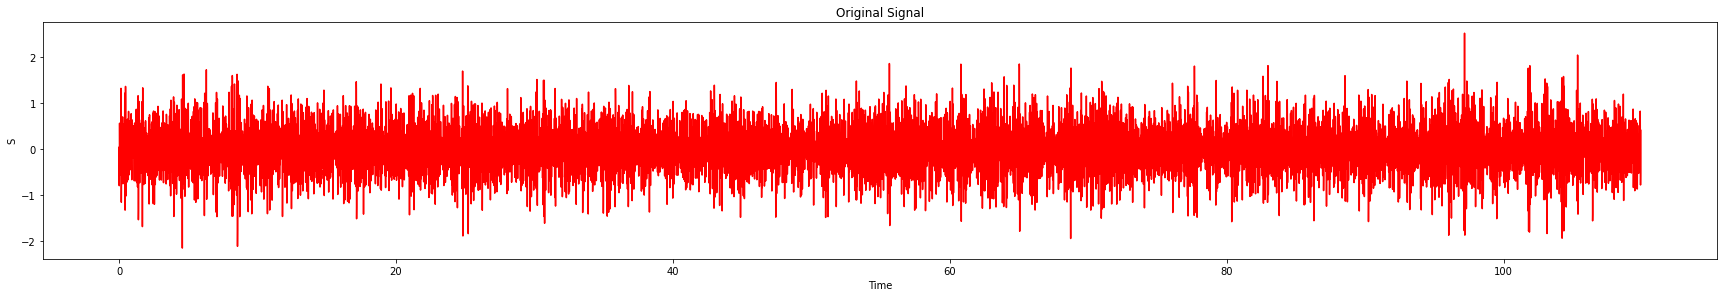

In [ ]:
samples = np.arange(0, len(dataPoints))
Fs = 128            # Sampling Frequency (Hz)
t = samples/Fs      # Time Vector (seconds)

#print(t)
#L = len(data_1)
#y=y[0:L]

plt.figure(figsize=(30,20))



plt.subplot(4,1,1)
plt.plot(t,data_t2[0:len(dataPoints)],color='r')
plt.xlabel('Time')
plt.ylabel('S')
plt.title('Original Signal')

plt.savefig('plot.jpg', dpi=100)
plt.show()

In [ ]:
def plotPowerSpectrum(points,name, count):
  scales = range(1,261)

  samples = np.arange(0, 1000)
  Fs = 128            
  time = samples/Fs      
  signal = points



  #waveletname = 'bior2.8'
  #waveletname = 'cmor'
  waveletname = 'morl' 
  cmap = plt.cm.seismic
  title = 'Wavelet Transform (Power Spectrum) of signal' 
  ylabel = 'Frequency' 
  xlabel = 'Time'



  dt = time[1] - time[0]
  [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
  power = (abs(coefficients)) ** 2
  period = 1. / frequencies
  levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
  contourlevels = np.log2(levels)
      
  fig, ax = plt.subplots(figsize=(15, 10))
  im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
      
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=18)
  ax.set_xlabel(xlabel, fontsize=18)
      
  yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
  ax.set_yticks(np.log2(yticks))
  ax.set_yticklabels(yticks)
  ax.invert_yaxis()
  ylim = ax.get_ylim()
  ax.set_ylim(ylim[0], -1)
      
  cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
  fig.colorbar(im, cax=cbar_ax, orientation="vertical")
  countstr = str(count)
  plt.savefig('plot'+name+countstr+'.jpg', dpi=100)
  plt.show()

  count = count + 1
  return count

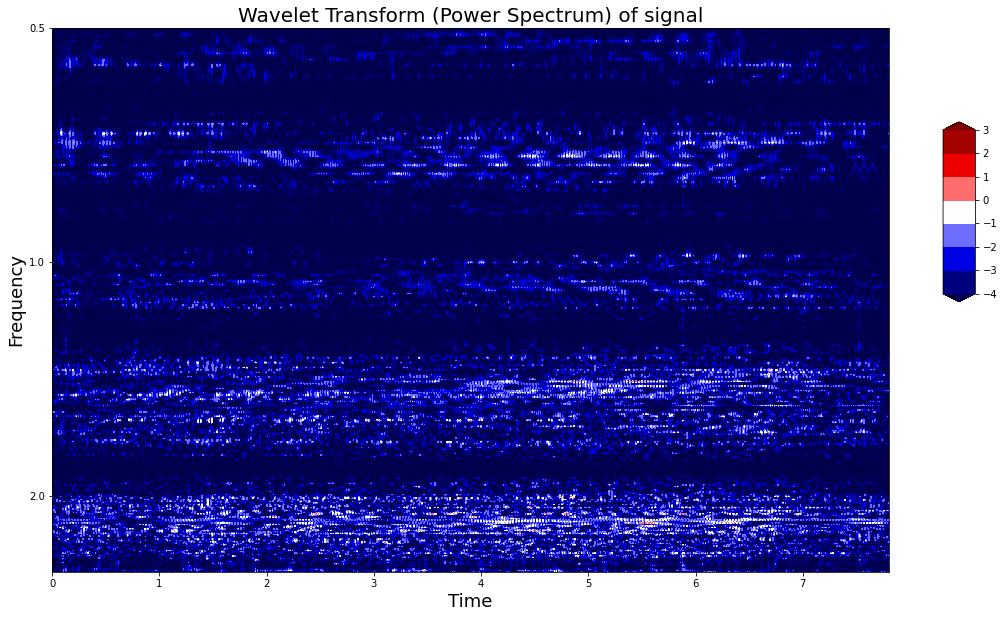

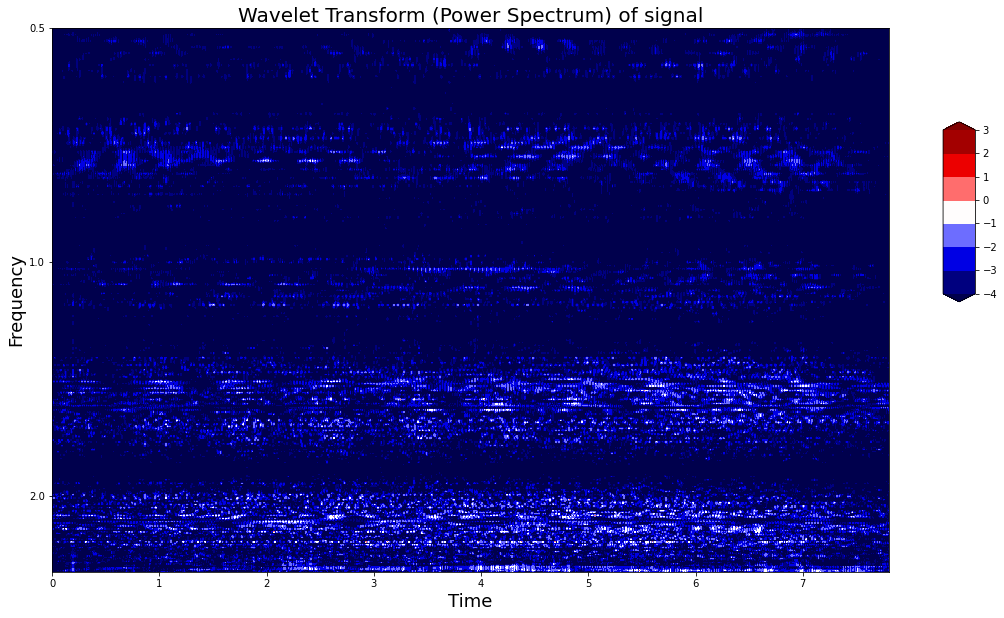

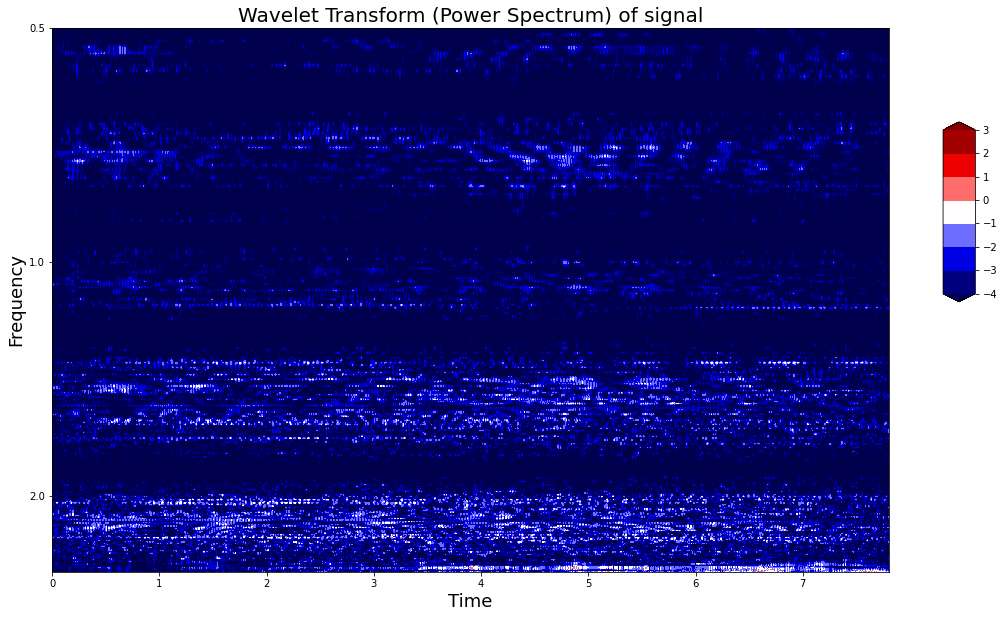

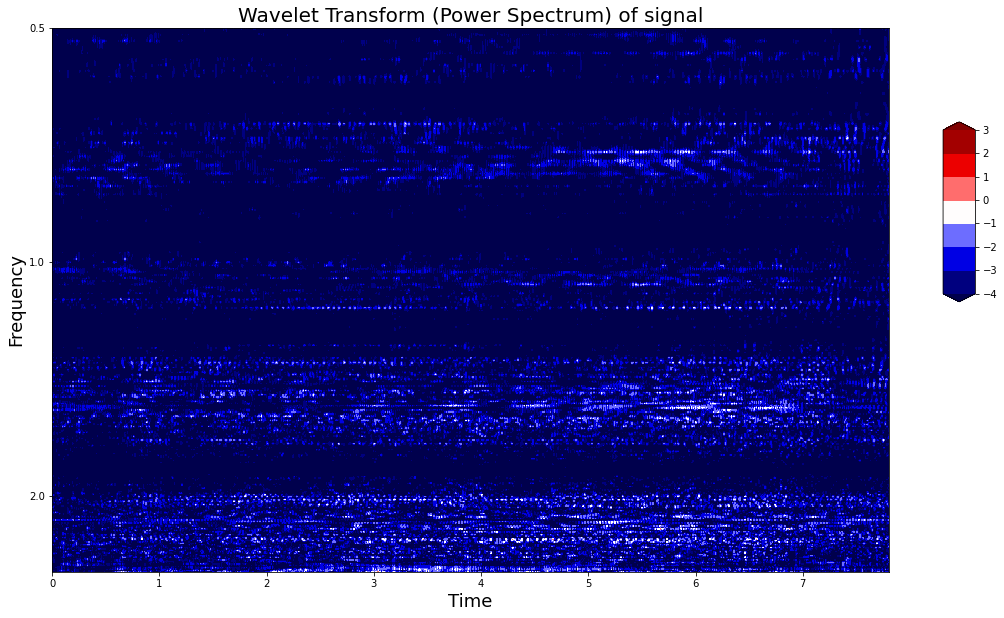

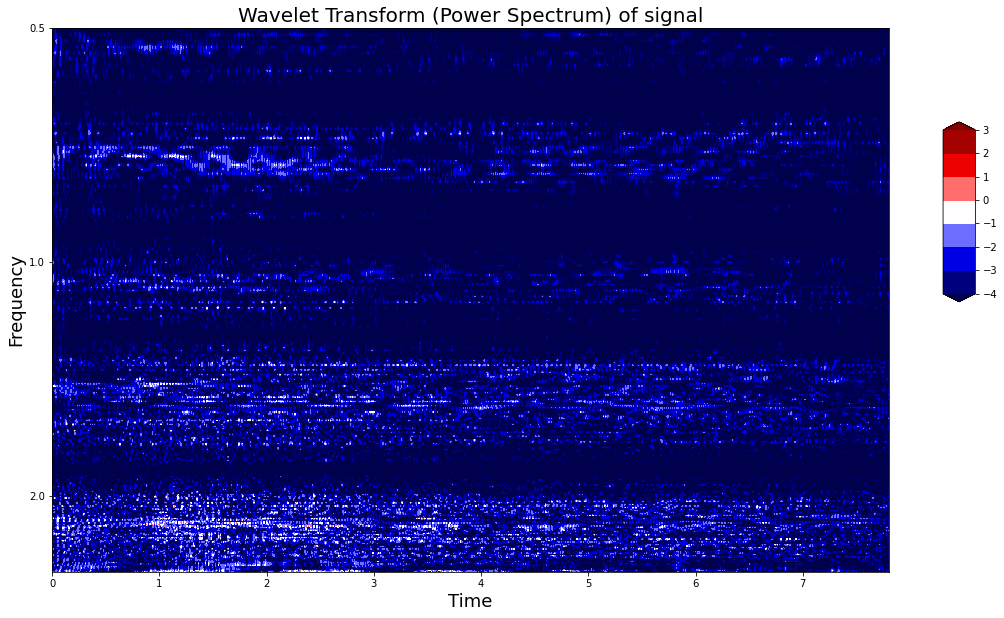

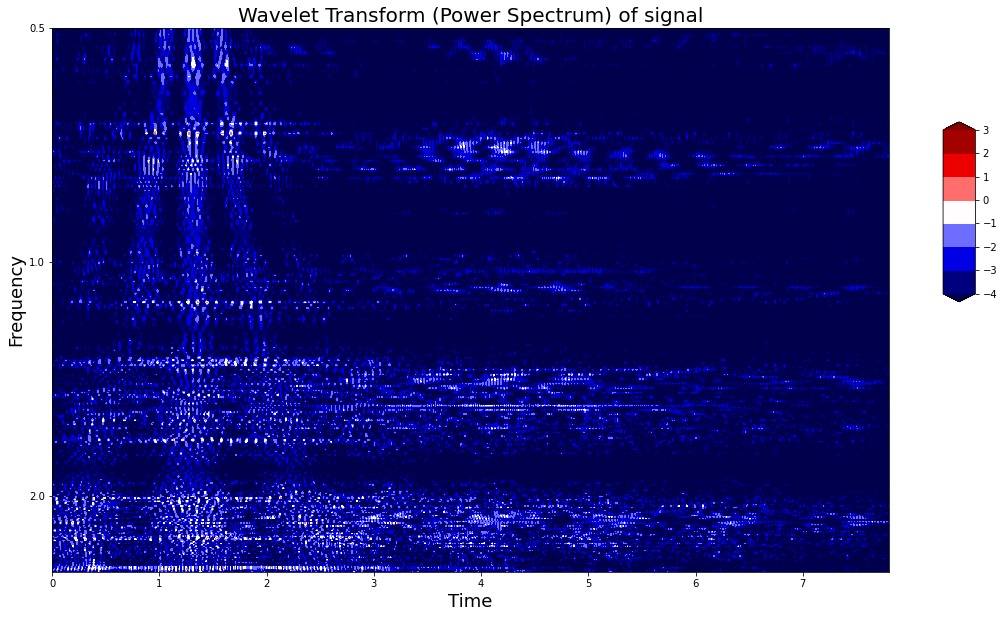

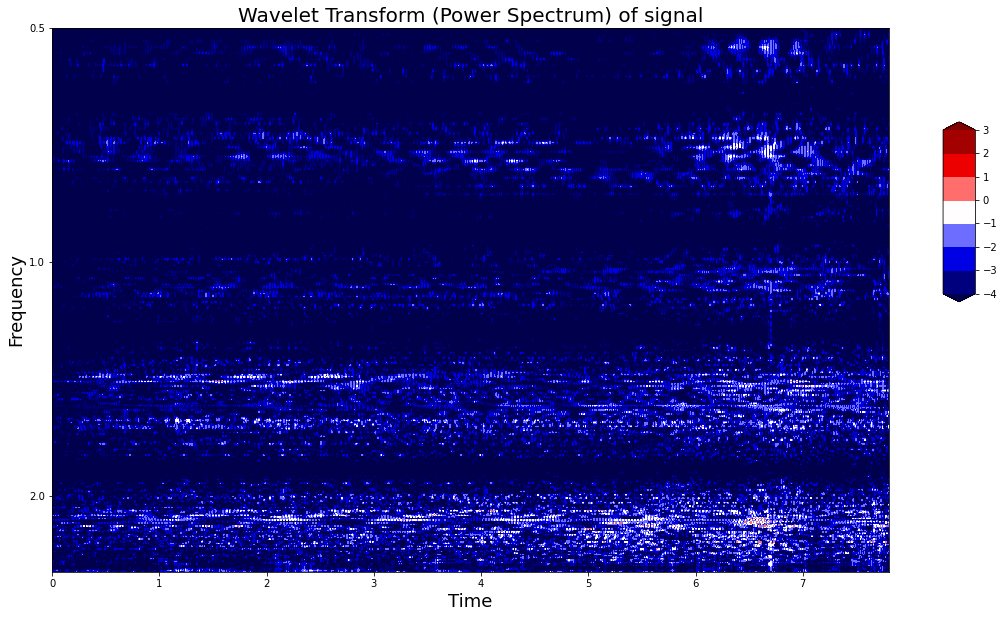

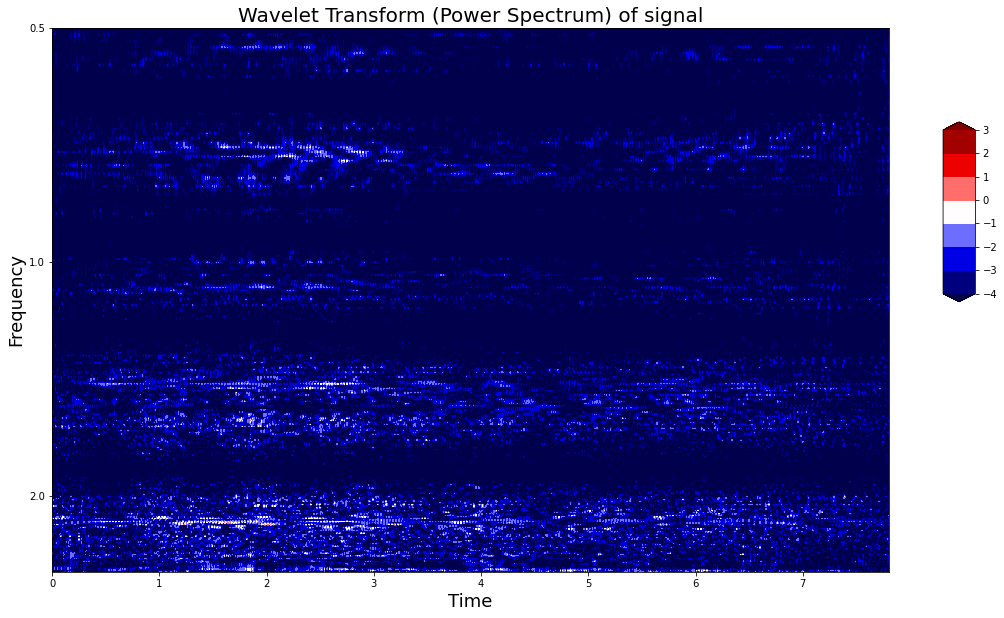

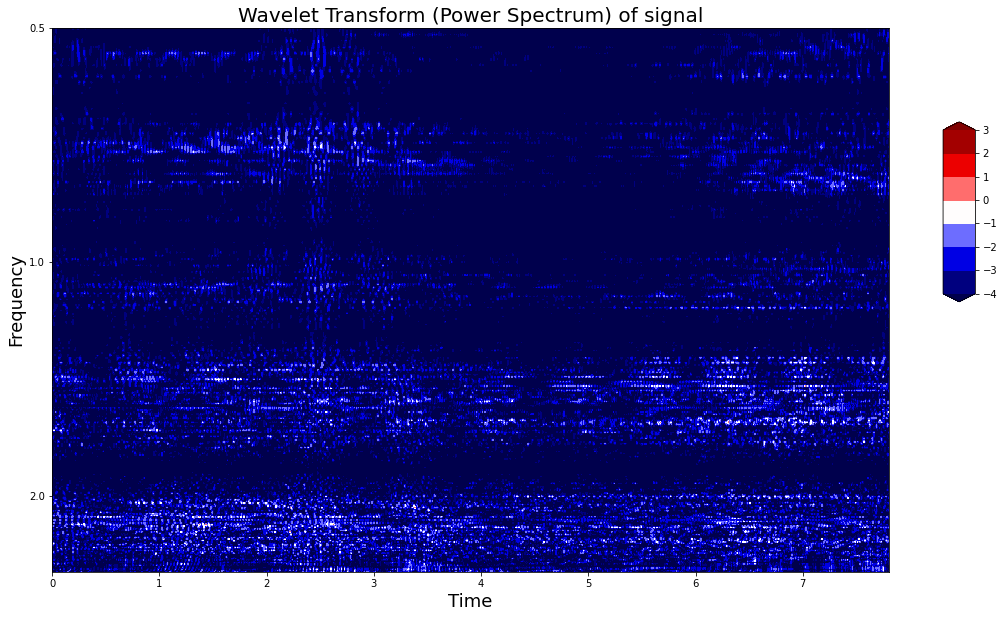

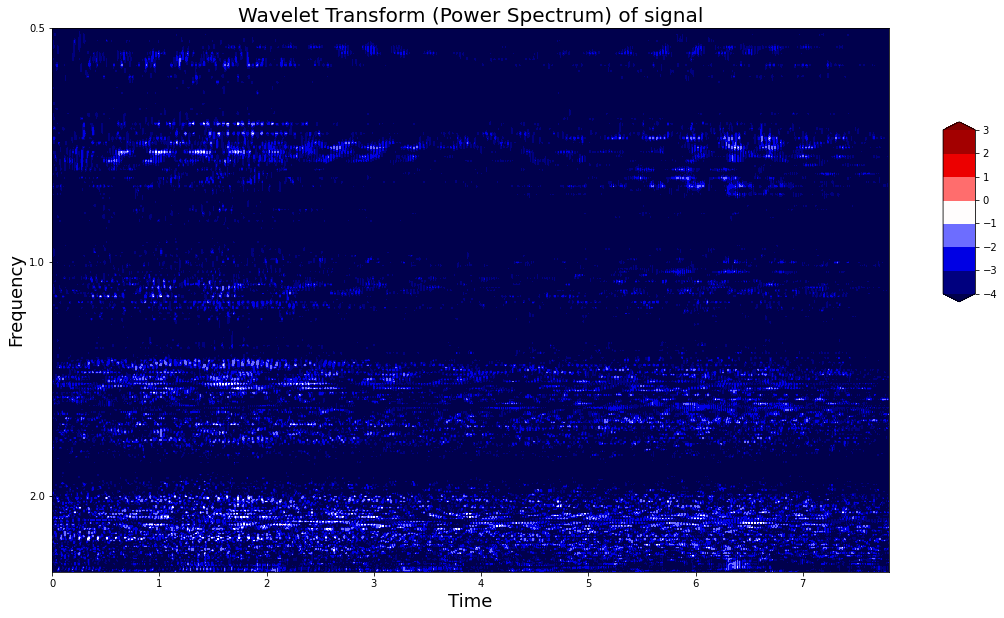

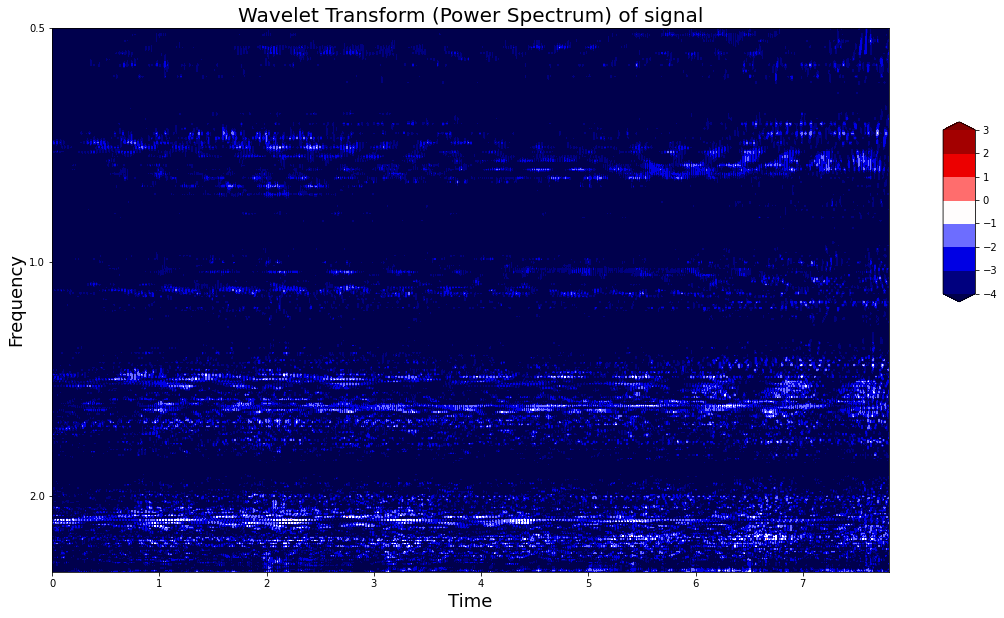

In [ ]:
c = 1000

for i in range(ran_l):
  j = i + 1
  c = c * j
  vi = c - 1000
  vf = c
  points = data_t2[vi : vf]
  name = pack + val_t + channel
  count = plotPowerSpectrum(points,name, count)
  c = 1000

In [ ]:
all_col = ran_l 

for ran in range(all_col):
  ran = ran + 1
  name1 = ran 
  name1 = str(name1 - 1)
  completeName = 'plot'+name+name1+'.jpg'
  MakeCopy = '!cp ' + completeName + ' "/content/drive/MyDrive/datasetCWT3/train/Control"'
  DeletedFile = '!rm ' + completeName
  print(MakeCopy)
  print(DeletedFile)

!cp plotv302ControlPz0.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz0.jpg
!cp plotv302ControlPz1.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz1.jpg
!cp plotv302ControlPz2.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz2.jpg
!cp plotv302ControlPz3.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz3.jpg
!cp plotv302ControlPz4.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz4.jpg
!cp plotv302ControlPz5.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz5.jpg
!cp plotv302ControlPz6.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz6.jpg
!cp plotv302ControlPz7.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz7.jpg
!cp plotv302ControlPz8.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz8.jpg
!cp plotv302ControlPz9.jpg "/content/drive/MyDrive/data

In [ ]:
!cp plotv302ControlPz0.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz0.jpg
!cp plotv302ControlPz1.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz1.jpg
!cp plotv302ControlPz2.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz2.jpg
!cp plotv302ControlPz3.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz3.jpg
!cp plotv302ControlPz4.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz4.jpg
!cp plotv302ControlPz5.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz5.jpg
!cp plotv302ControlPz6.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz6.jpg
!cp plotv302ControlPz7.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz7.jpg
!cp plotv302ControlPz8.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz8.jpg
!cp plotv302ControlPz9.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz9.jpg
!cp plotv302ControlPz10.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz10.jpg
!cp plotv302ControlPz11.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz11.jpg
!cp plotv302ControlPz12.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz12.jpg
!cp plotv302ControlPz13.jpg "/content/drive/MyDrive/datasetCWT3/train/Control"
!rm plotv302ControlPz13.jpg

